<a href="https://colab.research.google.com/github/trighpro123/Kinematic_2dof_robot/blob/main/Kinematic_robot_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
################ TẠO DỮ LIỆU CHO KINEMATIC



from openpyxl.workbook.defined_name import DefinedNameList
from openpyxl import Workbook
Wb=Workbook()
import math

#kich hoatj workbook
sheet = Wb.active
# parameter
l1=50
l2=40
do_pg=0.25
so_buoc=int(1/do_pg)
dem=0
#Tạo hàng tên dữ liệu đầu tiên
sheet.cell(row=1,column=1).value='Px'
sheet.cell(row=1,column=2).value='Py'
sheet.cell(row=1,column=3).value='t1'
sheet.cell(row=1,column=4).value='t2'
i=0
#for i in range(0,2):
for t1 in range(0,360*so_buoc+1): # Tạo số bước tương ứng vs độ phân giải vì range chỉ chấp nhận interger
  for t2 in range (0,180*so_buoc+1): # dữ liệu từ 0 đến 10
    Px=l1*math.cos((t1/so_buoc)/180*math.pi)+l2*math.cos((t1/so_buoc)/180*math.pi+(t2/so_buoc)/180*math.pi) # math.cos chỉ chấp nhận radiant
    Py=l1*math.sin((t1/so_buoc)/180*math.pi)+l2*math.sin((t1/so_buoc)/180*math.pi+(t2/so_buoc)/180*math.pi)
    if Px<1E-5 and Px>-1E-5: Px=0
    if Py<1E-5 and Py>-1E-5: Py=0
    #viết dữ liệu vào
    sheet.cell(row=(t2+2)+(t1)*(180*so_buoc+1)+i*(360*so_buoc+1)*(180*so_buoc+1),column=1).value=str(round(Px,2)) # row là công thức tính vị trí bỏ dữ liệu vào
    sheet.cell(row=(t2+2)+(t1)*(180*so_buoc+1)+i*(360*so_buoc+1)*(180*so_buoc+1),column=2).value=str(round(Py,2))
    sheet.cell(row=(t2+2)+(t1)*(180*so_buoc+1)+i*(360*so_buoc+1)*(180*so_buoc+1),column=3).value=str(t1/so_buoc)
    sheet.cell(row=(t2+2)+(t1)*(180*so_buoc+1)+i*(360*so_buoc+1)*(180*so_buoc+1),column=4).value=str(t2/so_buoc)
    dem+=1
print(dem)
#save 
Wb.save('test.xlsx')




519841


In [ ]:
##################### TẢI DỮ LIỆU LÊN
# Vì cái lưu file csv của python bị ngu nên phải lưu file xlsx rồi đem về excel chuyển thành csv

import pandas as pd
data = pd.read_csv('test.csv')
data.head(182)

## Tìm số lớn nhất
#max(data['Px'])

,Px,Py,t1,t2
0,90.00,0.00,0.0,0.00
1,90.00,0.17,0.0,0.25
2,90.00,0.35,0.0,0.50
3,90.00,0.52,0.0,0.75
4,89.99,0.70,0.0,1.00
...,...,...,...,...
177,78.65,27.91,0.0,44.25
178,78.53,28.04,0.0,44.50
179,78.41,28.16,0.0,44.75
180,78.28,28.28,0.0,45.00


In [ ]:
#Scale du lieu
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler

X= data.drop(['t1','t2'], axis=1)
y = data.drop(['Px','Py'], axis=1)
col_names = list(X.columns)

# s_scaler = StandardScaler() ############## Standardization giả định các quan sát có phân phối Gaussian (dạng hình chuông)
# X_df = s_scaler.fit_transform(X) ### Nếu phân phối dữ liệu không có dạng phân phối chuẩn thì việc áp dụng standardize cũng không hiệu quả.

scaler = MinMaxScaler()
X_df = scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
print(X_df.describe().T)
# X_df.head(50)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)





,count,mean,std,min,25%,50%,75%,max
Px,1038961.0,0.500193,0.251592,0.0,0.317444,0.500222,0.683000,1.0
Py,1038961.0,0.500098,0.251485,0.0,0.317444,0.500222,0.682833,1.0


In [ ]:
###############                         TRAINING

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils


# #Scale
# x_train_scale=scale(X_train)
# scaler=StandardScaler().fit(X_train)
# x_test_scale=scaler.transform(X_test)
# x_train_scale


#Tạo mo hình 
model=Sequential()
model.add(Dense(64,kernel_initializer='normal',activation='relu',input_shape=(2,)))
#model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
#model.add(Dropout(0.2))
# model.add(Dense(2,activation='softmax'))
# model.add(Dropout(0.2))
model.add(Dense(2))
model.summary()


# Biên dịch
# model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
# history=model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(X_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

# model.compile(loss='mse',optimizer=RMSprop(),metrics=['mean_absolute_error']) # máy sẽ tự hướng dẫn theo MSE
# history=model.fit(X_train,y_train,batch_size=128,epochs=100,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=20)]) 

model.compile(loss='mse',optimizer=RMSprop(),metrics=['mean_absolute_error']) # máy sẽ tự hướng dẫn theo MSE
history=model.fit(X_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=200)]) 



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                192       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2,338
Trainable params: 2,338
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4871/4871 [==============================] - 10s 2ms/step - loss: 2660.4951 - mean_absolute_error: 26.9870 - val_loss: 1217.6621 - val_mean_absolute_error: 17.5978
Epoch 2/500
4871/4871 [==============================] - 9s 2ms/step - loss: 831.1443 - mean_absolute_error: 12.0062 - val_loss: 736.5976 - 

In [ ]:
# SAVE
model.save("kinematic_robot_2_weights.h5")

    tested t1  tested t2  predicted t1  predicted t2
0      170.00     121.00    171.933777    119.746124
1      156.75     113.25    159.335663    111.120743
2       20.75     140.00     26.489588    139.272095
3       73.00     104.00     80.158653    103.175140
4      116.25     174.25    122.227409    174.734436
5       33.50      25.00     36.474693     25.001286
6      267.25      76.75    266.832275     75.948257
7       58.75     104.50     65.157555    104.671494
8       63.00     132.00     71.727226    131.262238
9      312.50     127.75    314.791962    127.896805
10     344.50     120.25    347.684143    119.906433
11     280.75      20.25    281.881989     19.823195
12     281.50      30.75    281.770294     31.589422
13      59.75       8.50     58.489830      9.994473
14      67.75      64.50     73.679771     64.919983
15     330.50      10.25    330.474945     12.888956
16     111.25     141.75    111.867897    141.436920
17     343.25     123.75    345.430023    123.

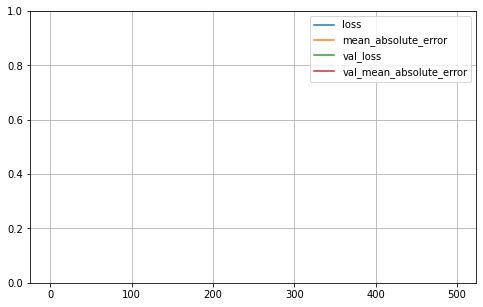

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


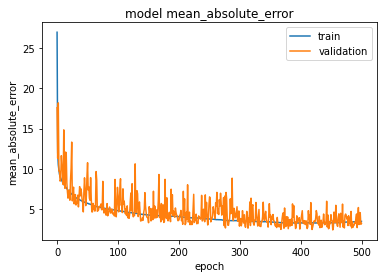

In [ ]:
#Coi ket qua predict và test

y_pred = model.predict(X_test)
cal = pd.DataFrame(np.c_[y_test, y_pred],columns = ['tested t1','tested t2','predicted t1','predicted t2'])
print(cal.head(50))

# # Vẽ đồ thị bằng plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['mean_absolute_error'])ư
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()
